# Part 1: Theoretical Analysis

**a. What is the minimal sample size required to guarantee a generalization error smaller than 30% with a probability of 80%?
Compute the theoretical sample size for the passive learner only.**

$$
m \geq \frac{\log\left(\frac{|\mathcal{H}|}{\delta}\right)}{\epsilon}
$$

$$
m \geq \frac{\log\left(\frac{2001}{0.2}\right)}{0.3} = 30.7
$$

$$
m ≈ 31
$$

# Part 2: Empirical Simulation

**Implement the passive and active learning algorithms using code (preferably in Python).**

In [1]:
import numpy as np

# Passive Learning Algorithm
def passive_learning(n_samples, threshold):
    samples = np.random.randint(-1000, 1001, size=n_samples)
    labels = (samples >= threshold).astype(int)
    labeled_0 = samples[labels == 0]
    labeled_1 = samples[labels == 1]

    if len(labeled_0) == 0 or len(labeled_1) == 0:
        return None  # Insufficient data

    x0 = np.max(labeled_0)
    x1 = np.min(labeled_1)
    return (x0 + x1) / 2


# Active Learning Algorithm
def active_learning(max_iterations, threshold, range_min=-1000, range_max=1000):
    for _ in range(max_iterations):
        query = (range_min + range_max) // 2
        label = 0 if query < threshold else 1
        if label == 0:
            range_min = query + 1
        else:
            range_max = query - 1
        if range_max - range_min <= 1:  # Stopping criterion
            break
    return (range_min + range_max) / 2

**b. Simulate the learning process multiple times for different sample sizes in order to estimate the required sample size empirically to guarantee**

In [10]:
# Generalization Error
def evaluate_generalization_error(estimated_threshold, true_threshold):
    total_range = 2001  # Total range of integers in [-1000, 1000]
    incorrect_range = abs(estimated_threshold - true_threshold)
    return incorrect_range / total_range


# Simulation
def simulate_learning(algorithm, true_threshold, n_samples, n_trials, epsilon=0.3):
    success_count = 0
    errors = []
    for _ in range(n_trials):
        if algorithm == "passive":
            estimated_threshold = passive_learning(n_samples, true_threshold)
        elif algorithm == "active":
            estimated_threshold = active_learning(n_samples, true_threshold)

        if estimated_threshold is None:
            continue  # Skip trials with insufficient data

        generalization_error = evaluate_generalization_error(estimated_threshold, true_threshold)
        errors.append(generalization_error)
        if generalization_error < epsilon:
            success_count += 1

    success_probability = success_count / n_trials
    std_dev = np.std(errors) if errors else 0
    return success_probability, std_dev  # Return probability and standard deviation


**c. Plot the probability of epsilon<30% against sample size. Add confidence intervals to the probabilities**

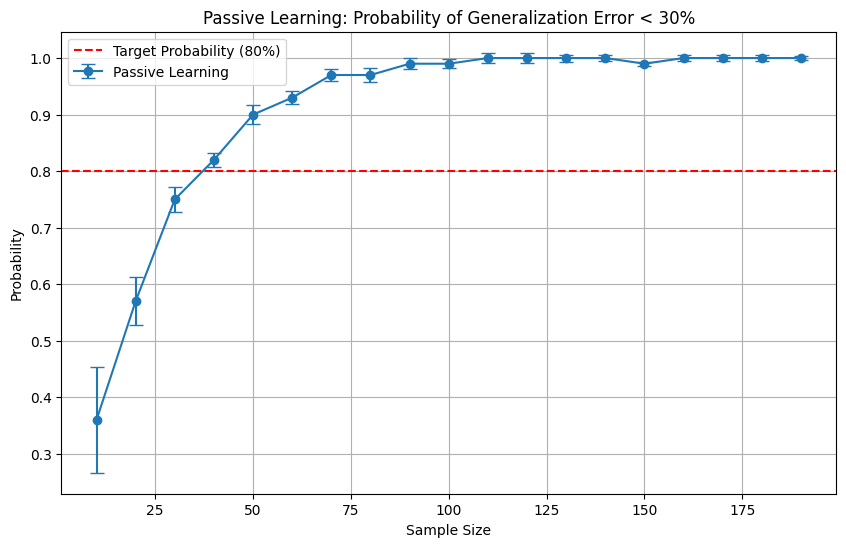

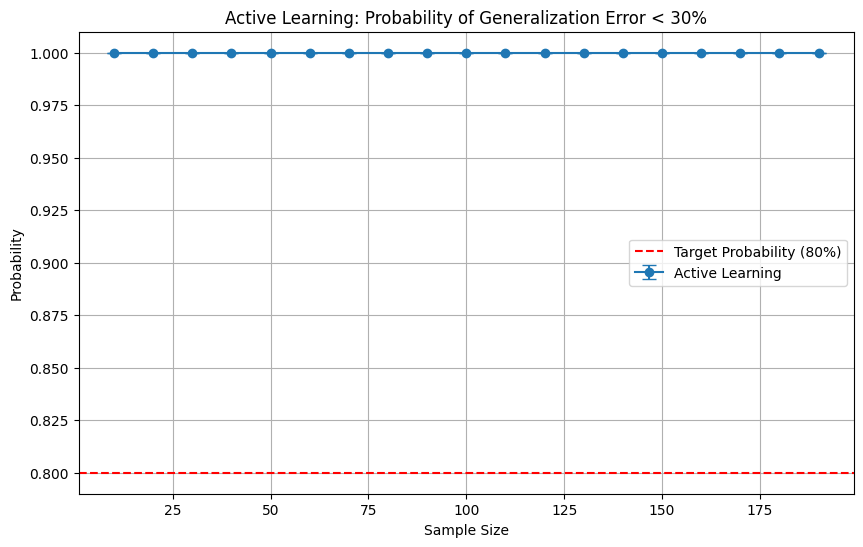

In [11]:
import matplotlib.pyplot as plt

# Plotting Function
def plot_results(sample_sizes, probabilities, std_devs, algorithm):
    plt.figure(figsize=(10, 6))
    plt.errorbar(sample_sizes, probabilities, yerr=1.96 * np.array(std_devs),
                 fmt='-o', capsize=5, label=f'{algorithm.capitalize()} Learning')
    plt.axhline(0.8, color='red', linestyle='--', label="Target Probability (80%)")
    plt.title(f'{algorithm.capitalize()} Learning: Probability of Generalization Error < 30%')
    plt.xlabel("Sample Size")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid()
    plt.show()


# Simulation Parameters
true_threshold = np.random.randint(-1000, 1001)  # Random threshold
n_trials = 100  # Number of trials per sample size
sample_sizes = range(10, 200, 10)  # Extended sample sizes to observe convergence
epsilon = 0.3

# Passive Learning Simulation
passive_probs, passive_stds = [], []
for n_samples in sample_sizes:
    prob, std_dev = simulate_learning("passive", true_threshold, n_samples, n_trials, epsilon)
    passive_probs.append(prob)
    passive_stds.append(std_dev)

# Plot Passive Learning Results
plot_results(sample_sizes, passive_probs, passive_stds, "passive")

# Active Learning Simulation
active_probs, active_stds = [], []
for n_samples in sample_sizes:
    prob, std_dev = simulate_learning("active", true_threshold, n_samples, n_trials, epsilon)
    active_probs.append(prob)
    active_stds.append(std_dev)

# Plot Active Learning Results
plot_results(sample_sizes, active_probs, active_stds, "active")


## Part 3: Discussion

**a. Compare Theoretical and Empirical Results:**

**a.1 Discuss any differences between the theoretical sample size and the simulated one for passive learning.**

* Theoretical Sample Size: Theoretical calculation suggests a sample size of 31 to achieve a generalization error smaller than 30% with 80% confidence.

* The empirical graph shows that the probability of achieving the target (80%) is met at around 35–40 sample sizes, slightly higher than the theoretical value of 31.

**a.2 Analyze potential reasons for these differences, if any.**

Reasons for Differences:
* Theoretical calculations assume ideal conditions, but real data may have higher variance or be less representative.
* Significant error bars at smaller sample sizes indicate variability, delaying the 80% threshold.
* Simulations with finite datasets may not fully capture the population distribution, especially with small samples.

**b. Passive vs. Active Learning:**

**b.1 Explain the differences in sample size requirements between passive and active learning.**

* Passive Learning: Needs more samples to achieve the target accuracy, with improvement seen slowly as sample size increases.
* Active Learning: Requires fewer samples, as it selects the most informative data points, quickly reaching high accuracy.

**b.2 Discuss the advantages and disadvantages of each learning strategy in this context.**

* Passive Learning:
  - Advantages: Simpler, no need for sample selection.
  - Disadvantages: Inefficient, requires more data for good performance.
* Active Learning:
  - Advantages: More efficient, uses fewer samples by focusing on the most uncertain data.
  - Disadvantages: More complex, requires an active selection strategy.

**b.3 Reflect on how the ability to select samples impacts the learning efficiency**

* Passive Learning: Random sampling leads to slower learning and more data required.
* Active Learning: Selects the most informative samples, speeding up learning and reducing sample needs.